# Info

2D example of vhgpr

In [1]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, RBF, ConstantKernel as C
import matplotlib.pyplot as plt
from vhgpr import VHGPR
from fourbranches import f, mean, std

In [2]:
plt.rcParams.update({'font.size': 16})

### Data 

In [3]:
np.random.seed(1)
DX = np.random.rand(600, 2) * 10 - 5 
DY = f(DX)

### Model

In [4]:
kernelf = C(10.0, (1e-1, 1e2)) * RBF((5,5), (1e-1, 1e2)) 
kernelg = C(2, (1e-1, 1e1)) * RBF((2,2), (1e-1, 1e1))
model = VHGPR(kernelf, kernelg) # fit 5 times 
model.fit(DX, DY)

### Prediction and plot

In [5]:
grid = 80
x = np.linspace(-5, 5, grid)
y = np.linspace(-5, 5, grid)
meshx, meshy = np.meshgrid(x,y)
# True values in grids 
truefunc_mean = [[mean(np.array([[j,i]]))[0] for j in x]for i in y]
truefunc_std = [[std(np.array([[j,i]]))[0] for j in x]for i in y]
# Predictions in grids 
meshsample = np.array([[[j,i] for j in x] for i in y])
predresults = model.predict(meshsample.reshape(grid**2, 2))
predfunc_mean = predresults[0].reshape(grid, grid)
predfunc_std = np.sqrt(np.exp(predresults[2].reshape(grid, grid)))

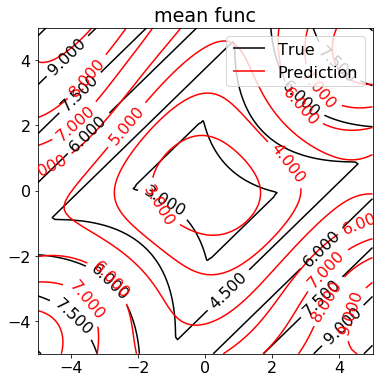

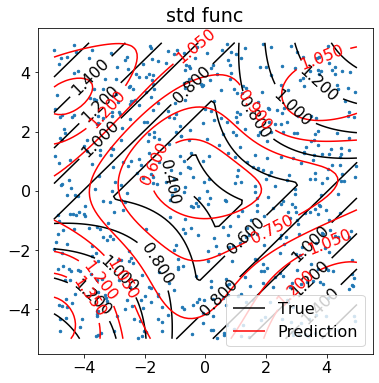

In [6]:
plt.figure(figsize = (6,6))
axes1 = plt.contour(meshx, meshy, truefunc_mean, colors="Black")
axes2 = plt.contour(meshx, meshy, predfunc_mean, colors="Red")
plt.clabel(axes1)
plt.clabel(axes2)
plt.title('mean func')
lines = [ axes1.collections[0], axes2.collections[0]]
labels = ['True', 'Prediction']
plt.legend(lines, labels)
plt.show()

plt.figure(figsize = (6,6))
axes1 = plt.contour(meshx, meshy, truefunc_std, colors="Black")
axes2 = plt.contour(meshx, meshy, predfunc_std, colors="Red")
plt.scatter(DX[:,0], DX[:,1], s=6)
plt.clabel(axes1)
plt.clabel(axes2)
plt.title('std func')
lines = [ axes1.collections[0], axes2.collections[0]]
labels = ['True', 'Prediction']
plt.legend(lines, labels)
plt.show()